# Imports

In [1]:
# Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from helpers import *

# Loading dataset

In [2]:
# Loading the dataset
lipids = loading_lipids()

# Selecting lipids data in the 12 section of the brain
section_12 = select_section_lipids(lipids)

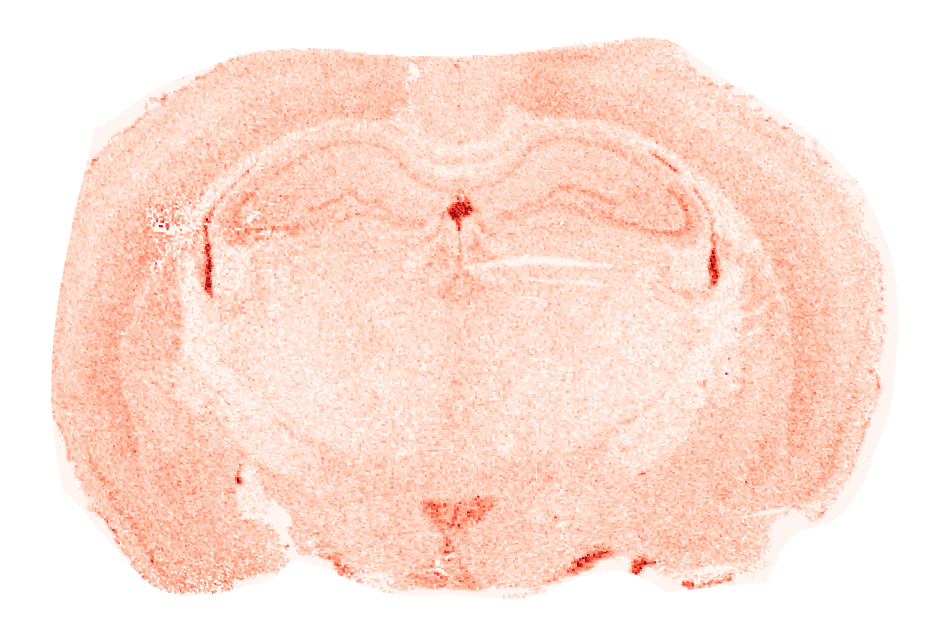

In [3]:
# Plot a single lipid
plt.figure(figsize=(12, 8))

dot_size = 1.5

sc1 = plt.scatter(section_12['z_ccf'], - section_12['y_ccf'], c=section_12['SHexCer 38:1;3'], s=dot_size, cmap="Reds", alpha=1)

plt.axis('off')
plt.show()

# note the large black contour is just a matrix from the experiment and not the brain, you should remove it

# Data exploration

In [4]:
# Print dataset
print(section_12.head())

                          x_ccf     y_ccf     z_ccf  LPC O-16:2  LPC 16:0_dup  \
section12_pixel23_121  7.621452  0.312450  7.882461    0.000140      0.000112   
section12_pixel23_122  7.621452  0.313953  7.859683    0.000213      0.000112   
section12_pixel23_123  7.621452  0.315503  7.837031    0.000154      0.000100   
section12_pixel23_124  7.621452  0.317101  7.814505    0.000147      0.000113   
section12_pixel23_125  7.621452  0.318745  7.792104    0.000229      0.000112   

                       LPC O- 18:3  LPC O-18:2  LPC O-16:2_dup  LPC 15:1  \
section12_pixel23_121     0.000116    0.000125        0.000214  0.000100   
section12_pixel23_122     0.000114    0.000125        0.000204  0.000162   
section12_pixel23_123     0.000117    0.000134        0.000195  0.000151   
section12_pixel23_124     0.000114    0.000136        0.000229  0.000154   
section12_pixel23_125     0.000115    0.000206        0.000100  0.000100   

                       LPC 18:1  ...  PG(42:6)   Hex2Cer

In [5]:
# Info on the dataset
print(section_12.info())

<class 'pandas.core.frame.DataFrame'>
Index: 94747 entries, section12_pixel23_121 to section12_pixel308_161
Columns: 208 entries, x_ccf to y
dtypes: float32(3), float64(202), int64(3)
memory usage: 152.0+ MB
None


In [6]:
# Statistics
print(section_12.describe())

              x_ccf         y_ccf         z_ccf    LPC O-16:2  LPC 16:0_dup  \
count  94747.000000  94747.000000  94747.000000  94747.000000  94747.000000   
mean       7.621452      3.890388      5.834257      0.001170      0.000497   
std        0.003200      1.918976      2.687550      0.000514      0.000207   
min        7.621452      0.312450      0.865772      0.000100      0.000100   
25%        7.621452      2.233024      3.519835      0.000826      0.000357   
50%        7.621452      3.885575      5.827421      0.001152      0.000471   
75%        7.621452      5.545235      8.144789      0.001482      0.000608   
max        7.621452      7.438256     10.872088      0.004125      0.003632   

        LPC O- 18:3    LPC O-18:2  LPC O-16:2_dup      LPC 15:1      LPC 18:1  \
count  94747.000000  94747.000000    94747.000000  94747.000000  94747.000000   
mean       0.000601      0.000510        0.000458      0.001122      0.000503   
std        0.000219      0.000173        0.00

In [7]:
# x_cff is a constant value, because we are considering one section
np.min(section_12['x_ccf'])
np.max(section_12['x_ccf'])

7.6214518547058105

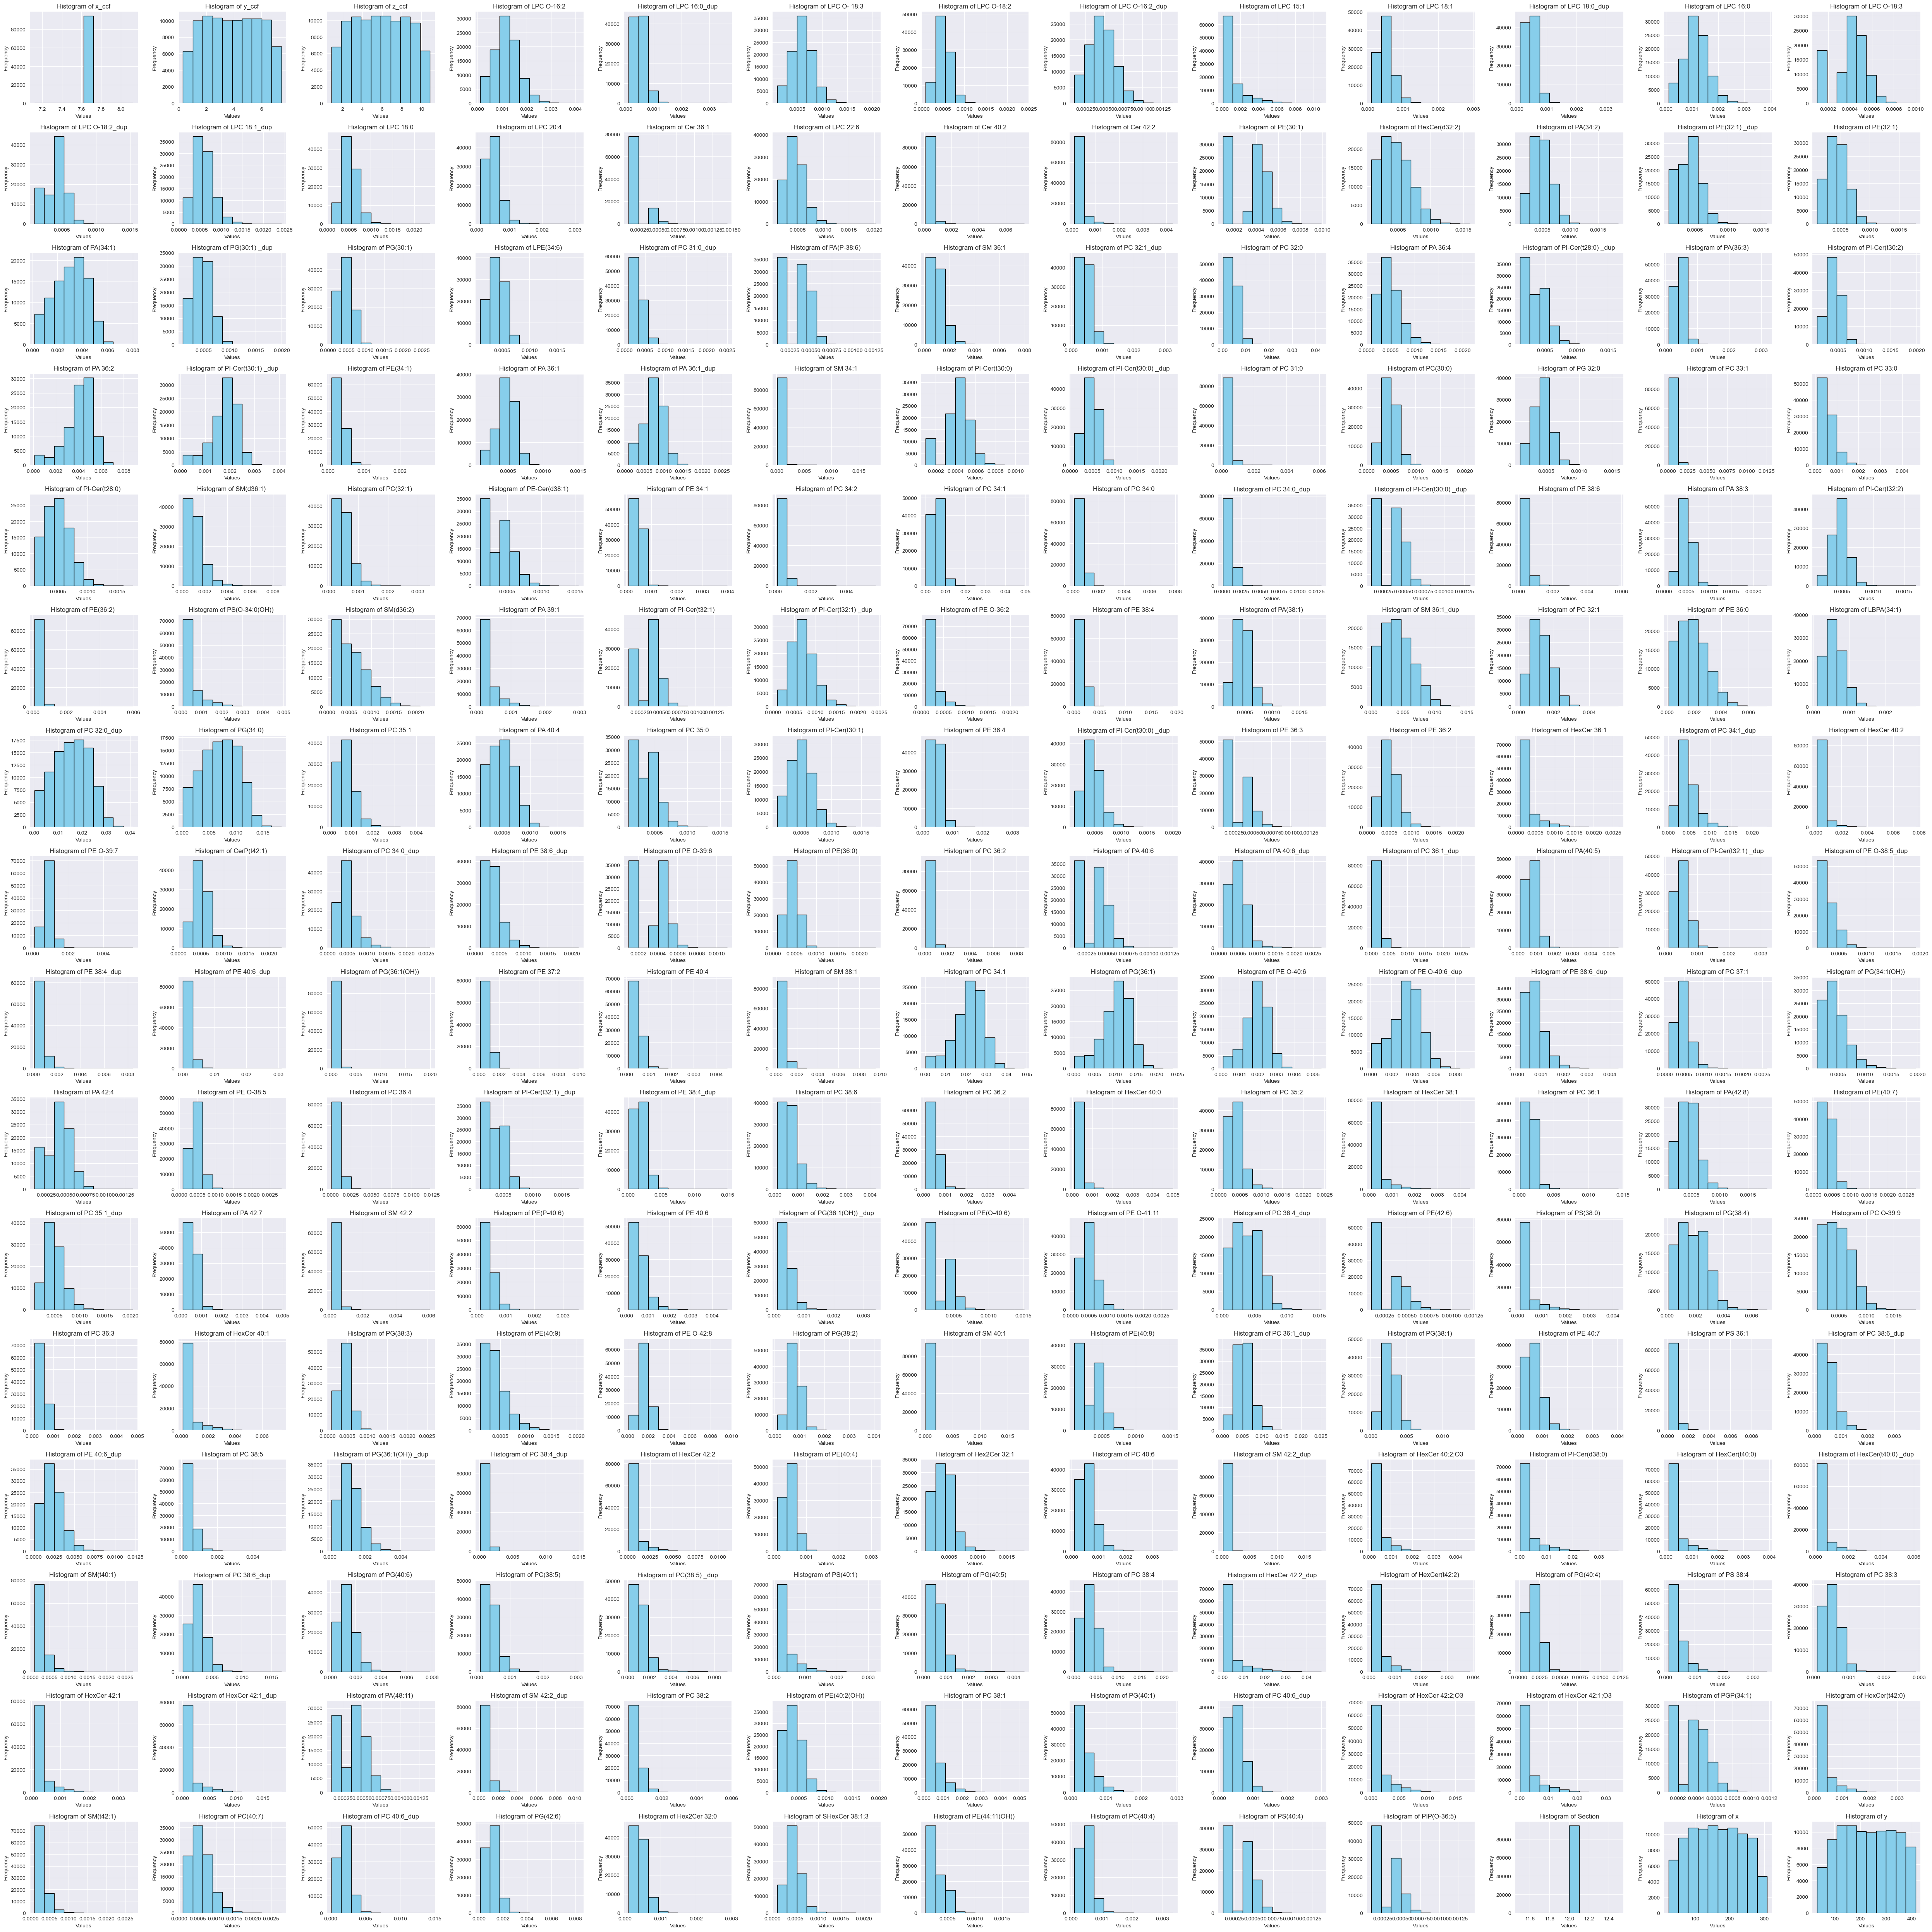

In [11]:
rows = 16
columns = 13

assert rows * columns <= 208

fig, ax = plt.subplots(rows, columns, figsize=(50, 50))

for i in range(rows):
    for j in range(columns):
        assert i * columns + j < 208
        data = section_12.iloc[:, i * columns + j].values
        ax[i, j].hist(data, bins=10, color='skyblue', edgecolor='black')
        ax[i, j].set_xlabel('Values')
        ax[i, j].set_ylabel('Frequency')
        ax[i, j].set_title(f'Histogram of {section_12.columns.values[i * columns + j]}')

plt.tight_layout()

# Correlation and Clustering

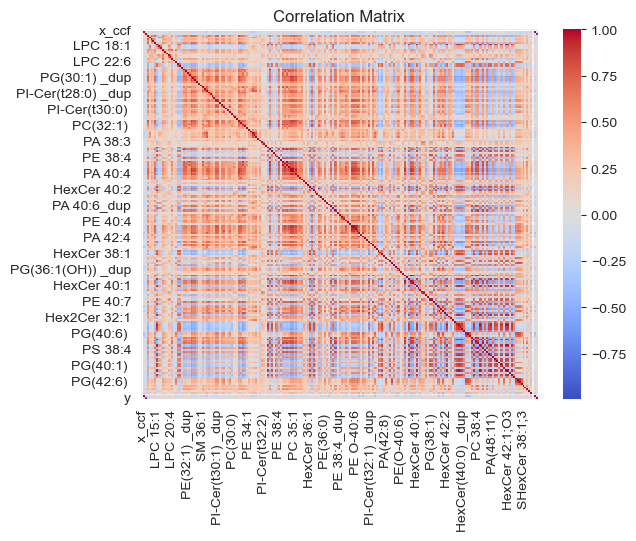

x_ccf     y_ccf     z_ccf  LPC O-16:2  LPC 16:0_dup  \
x_ccf           NaN       NaN       NaN         NaN           NaN   
y_ccf           NaN  1.000000 -0.028646    0.035318     -0.055075   
z_ccf           NaN -0.028646  1.000000    0.062494     -0.014369   
LPC O-16:2      NaN  0.035318  0.062494    1.000000      0.211690   
LPC 16:0_dup    NaN -0.055075 -0.014369    0.211690      1.000000   
...             ...       ...       ...         ...           ...   
PS(40:4)        NaN  0.052006 -0.088829   -0.005455      0.136431   
PIP(O-36:5)     NaN -0.214189 -0.070515    0.241044      0.217095   
Section         NaN       NaN       NaN         NaN           NaN   
x               NaN  0.997105  0.013340    0.050472     -0.054177   
y               NaN  0.052977 -0.994941   -0.055931      0.018057   

              LPC O- 18:3  LPC O-18:2  LPC O-16:2_dup  LPC 15:1  LPC 18:1  \
x_ccf                 NaN         NaN             NaN       NaN       NaN   
y_ccf            0.183009    0.184895       -0.136773 -0.002483  0.063550   
z_ccf            0.066174    0.041786       -0.086224 -0.082444 -0.039830   
LPC O-16:2       0.735316    0.600972        0.708724 -0.391074 -0.123568   
LPC 16:0_dup     0.178710    0.165475        0.132870  0.107091  0.650639   
...                   ...         ...             ...       ...       ...   
PS(40:4)         0.088803    0.114914        0.041773  0.257407  0.228711   
PIP(O-36:5)      0.111675    0.073085        0.306109 -0.128185  0.030062   
Section               NaN         NaN             NaN       NaN       NaN   
x                0.187281    0.185670       -0.130018 -0.024779  0.050808   
y               -0.056298   -0.031945        0.084424  0.080819  0.043267   

              ...  PG(42:6)   Hex2Cer 32:0  SHexCer 38:1;3  PE(44:11(OH))   \
x_ccf         ...        NaN           NaN             NaN             NaN   
y_ccf         ...  -0.121236     -0.130718        0.055896       -0.163181   
z_ccf         ...  -0.112678     -0.067348       -0.094636       -0.079227   
LPC O-16:2    ...   0.400589      0.298737        0.369813        0.074109   
LPC 16:0_dup  ...   0.183346      0.170909        0.110814        0.131908   
...           ...        ...           ...             ...             ...   
PS(40:4)      ...  -0.019191     -0.037126        0.163173        0.145563   
PIP(O-36:5)   ...   0.346591      0.282118        0.192778        0.121343   
Section       ...        NaN           NaN             NaN             NaN   
x             ...  -0.130139     -0.138111        0.054616       -0.164843   
y             ...   0.108090      0.063299        0.094111        0.074342   

              PC(40:4)   PS(40:4)   PIP(O-36:5)   Section         x         y  
x_ccf               NaN        NaN           NaN      NaN       NaN       NaN  
y_ccf          0.216601   0.052006     -0.214189      NaN  0.997105  0.052977  
z_ccf         -0.100394  -0.088829     -0.070515      NaN  0.013340 -0.994941  
LPC O-16:2     0.410831  -0.005455      0.241044      NaN  0.050472 -0.055931  
LPC 16:0_dup   0.101956   0.136431      0.217095      NaN -0.054177  0.018057  
...                 ...        ...           ...      ...       ...       ...  
PS(40:4)       0.194385   1.000000      0.040954      NaN  0.042209  0.087664  
PIP(O-36:5)    0.130699   0.040954      1.000000      NaN -0.213890  0.065345  
Section             NaN        NaN           NaN      NaN       NaN       NaN  
x              0.212416   0.042209     -0.213890      NaN  1.000000  0.013623  
y              0.103766   0.087664      0.065345      NaN  0.013623  1.000000  

[208 rows x 208 columns]

In [12]:
# Example: Correlation matrix
correlation_matrix = section_12.corr(method='spearman')
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

correlation_matrix

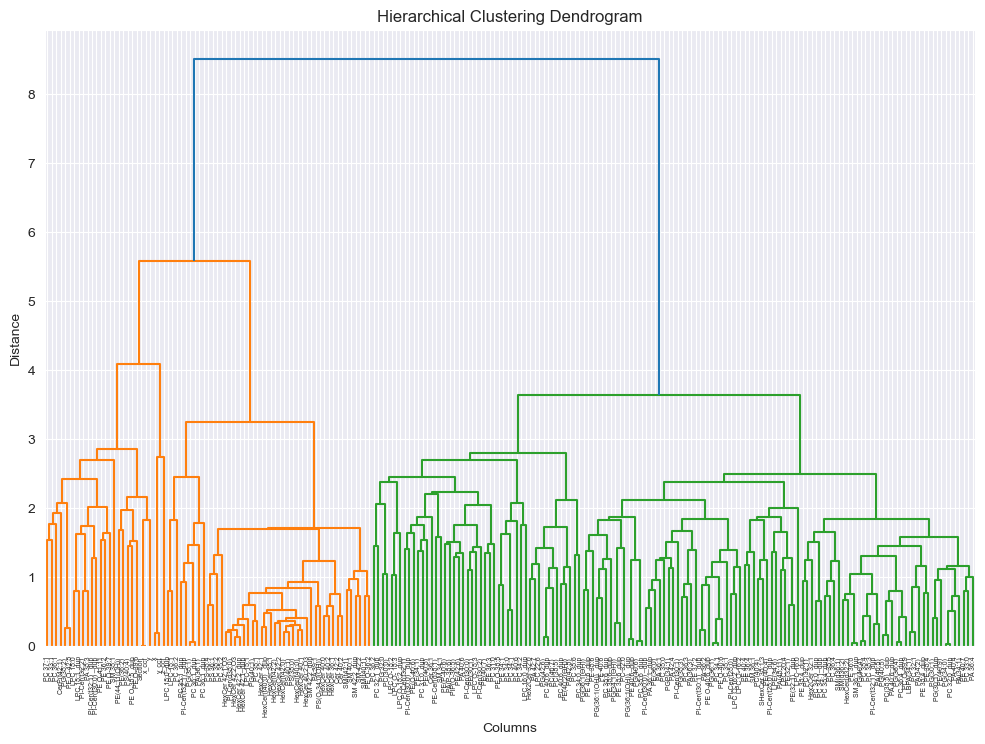

In [13]:
correlation_matrix = np.nan_to_num(correlation_matrix)

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(correlation_matrix, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=section_12.columns, orientation='top', distance_sort='descending')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Columns')
plt.ylabel('Distance')
plt.show()

In [14]:
# Cut the dendrogram to obtain clusters
threshold = 2  # Adjust the threshold as needed
clusters = hierarchy.fcluster(linkage_matrix, t=threshold, criterion='distance')

# Create a dictionary to store columns for each cluster
cluster_columns = {}

# Iterate through columns and their corresponding cluster labels
for col, cluster_label in zip(section_12.columns, clusters):
    if cluster_label not in cluster_columns:
        cluster_columns[cluster_label] = []
    cluster_columns[cluster_label].append(col)

# Print or use the list of columns in each cluster
for cluster_label, columns in cluster_columns.items():
    print(f"Cluster {cluster_label} columns: {columns}")

Cluster 21 columns: ['x_ccf', 'Section', 'y']
Cluster 19 columns: ['y_ccf', 'x']
Cluster 20 columns: ['z_ccf']
Cluster 3 columns: ['LPC O-16:2', 'LPC O-16:2_dup', 'PA(36:3)\xa0', 'PA 36:2', 'PI-Cer(t30:1)\xa0_dup', 'PA 36:1', 'PA 36:1_dup', 'PI-Cer(t30:0)\xa0_dup', 'PI-Cer(t28:0)\xa0', 'PC 35:1', 'PC 35:0', 'PI-Cer(t30:1)\xa0', 'PE(36:0)\xa0', 'PE 37:2', 'PC 34.1', 'PG(36:1)\xa0', 'PE O-40:6', 'PE O-40:6_dup', 'PA 42:4', 'PC 36:3', 'PG(38:3)\xa0', 'PGP(34:1) ']
Cluster 7 columns: ['LPC 16:0_dup', 'PC 34:2']
Cluster 13 columns: ['LPC O- 18:3', 'LPC O-18:2', 'LPC O-18:2_dup']
Cluster 16 columns: ['LPC 15:1', 'Cer 40:2', 'Cer 42:2', 'PS(O-34:0(OH))\xa0', 'PA 39:1', 'PE O-36:2', 'HexCer 36:1', 'HexCer 40:2', 'HexCer 40:0', 'PC 35:2', 'HexCer 38:1', 'SM 42:2', 'PS(38:0)\xa0', 'HexCer 40:1', 'SM 40:1', 'PS 36:1', 'HexCer 42:2', 'SM 42:2_dup', 'HexCer 40:2;O3', 'PI-Cer(d38:0)\xa0', 'HexCer(t40:0)\xa0', 'HexCer(t40:0)\xa0_dup', 'SM(t40:1)\xa0', 'PS(40:1)\xa0', 'HexCer 42:2_dup', 'HexCer(t42:2)

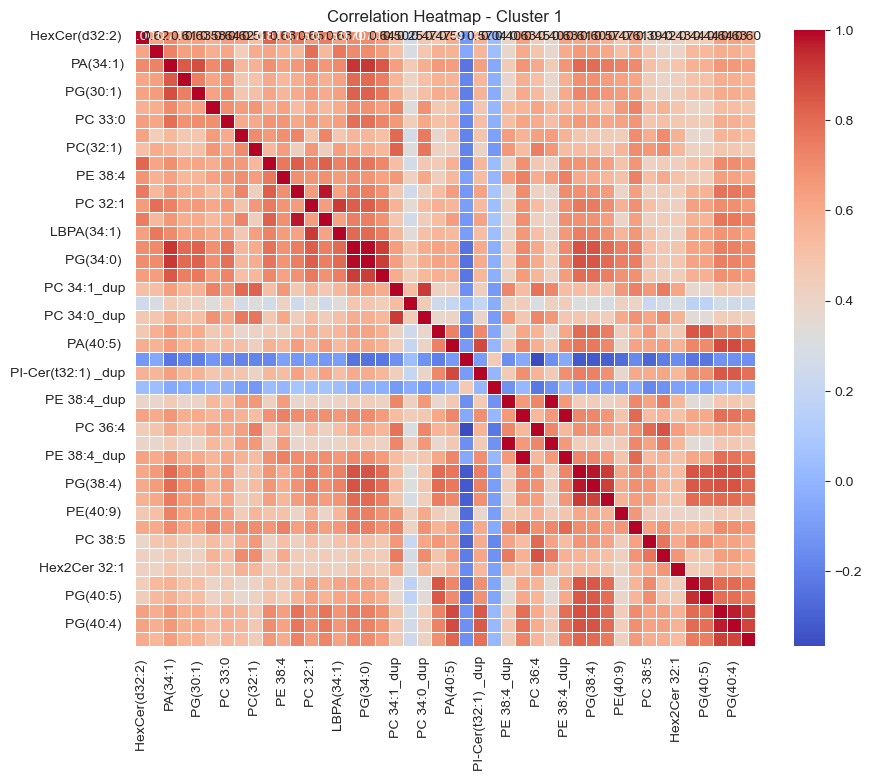

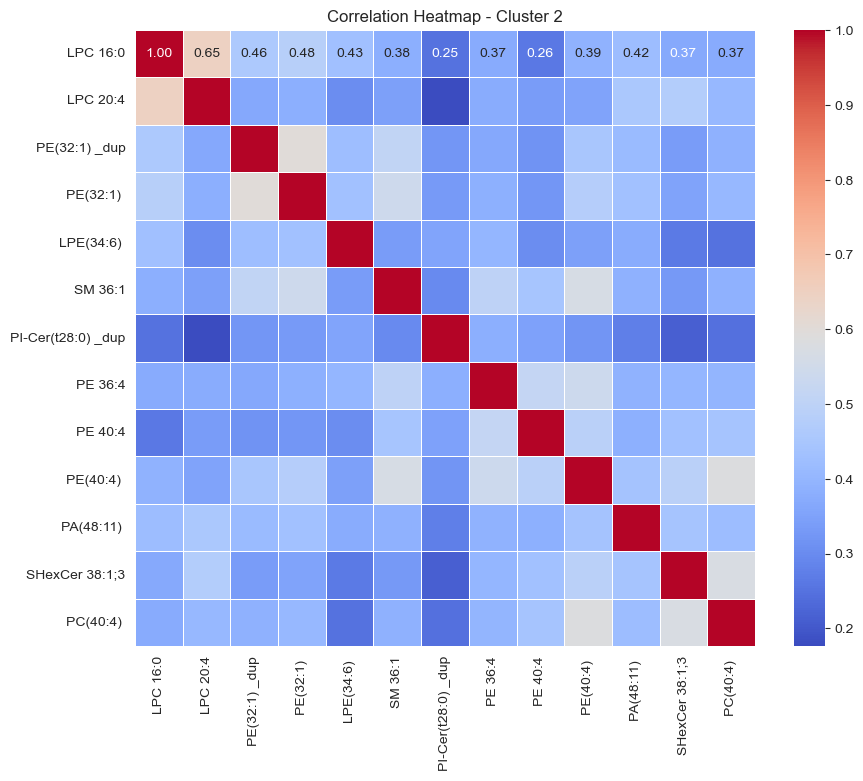

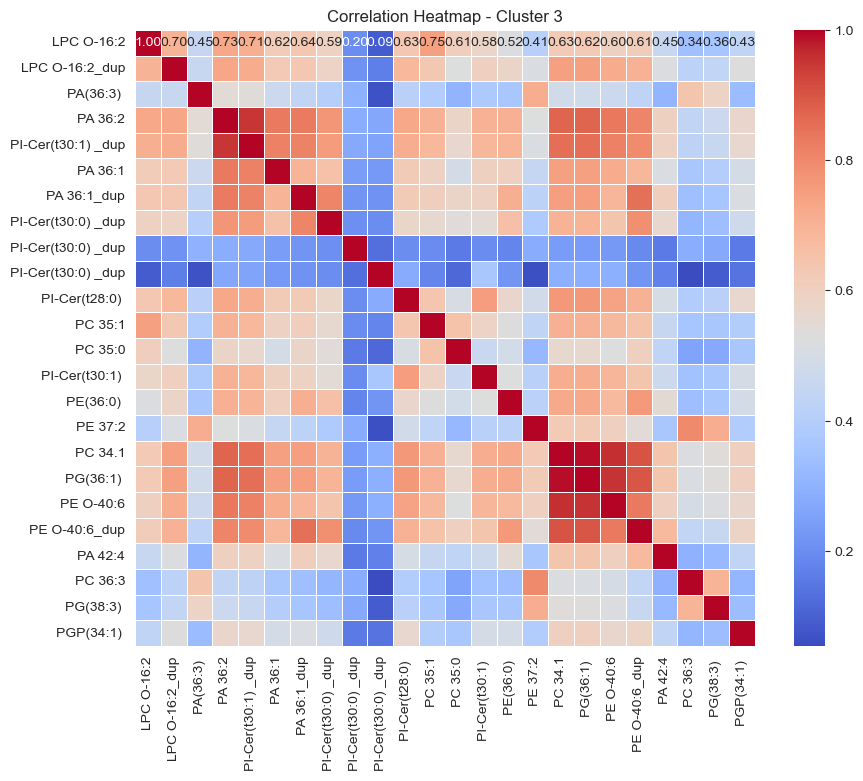

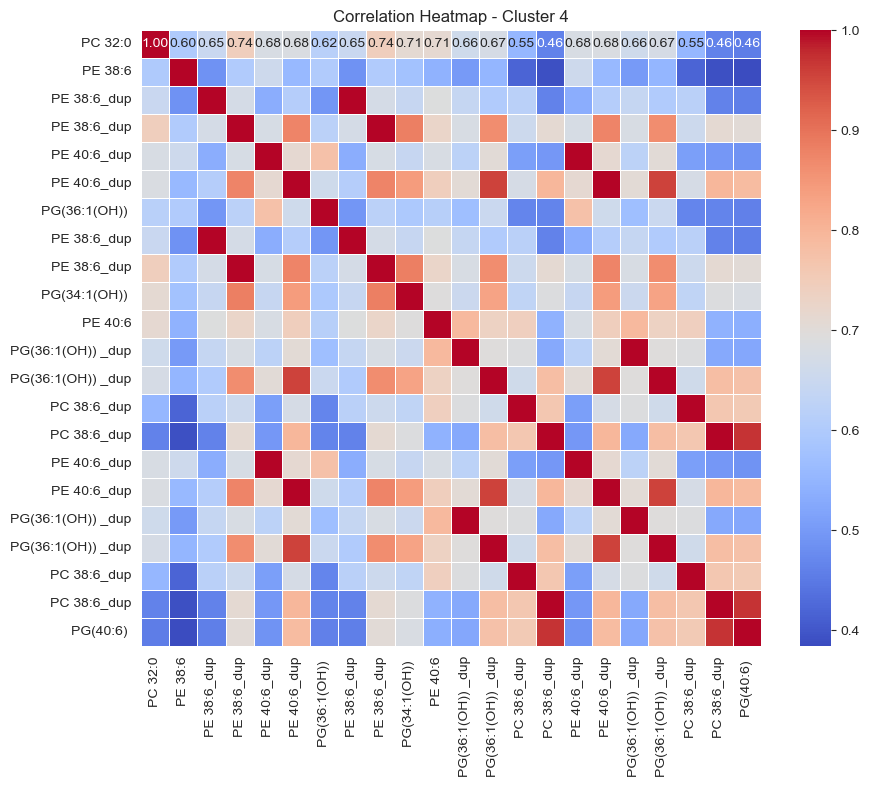

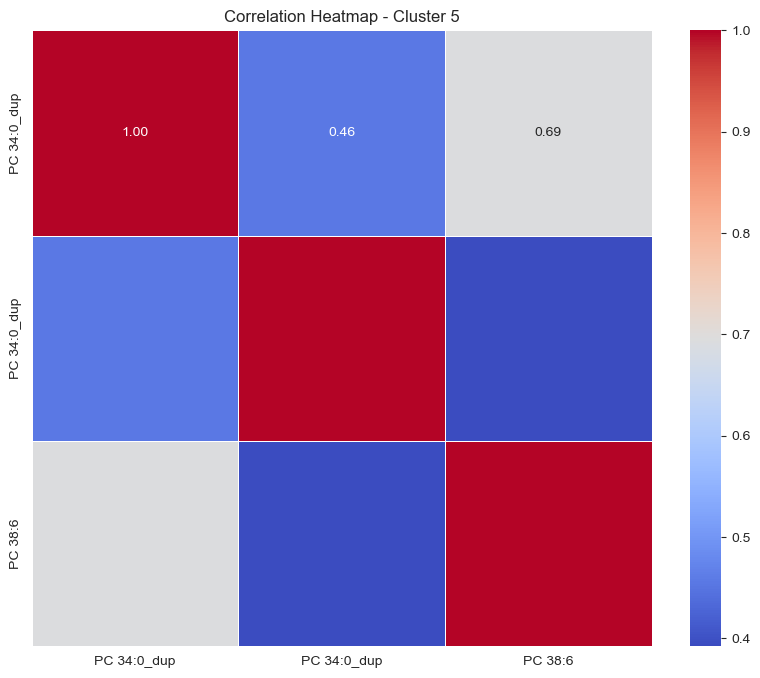

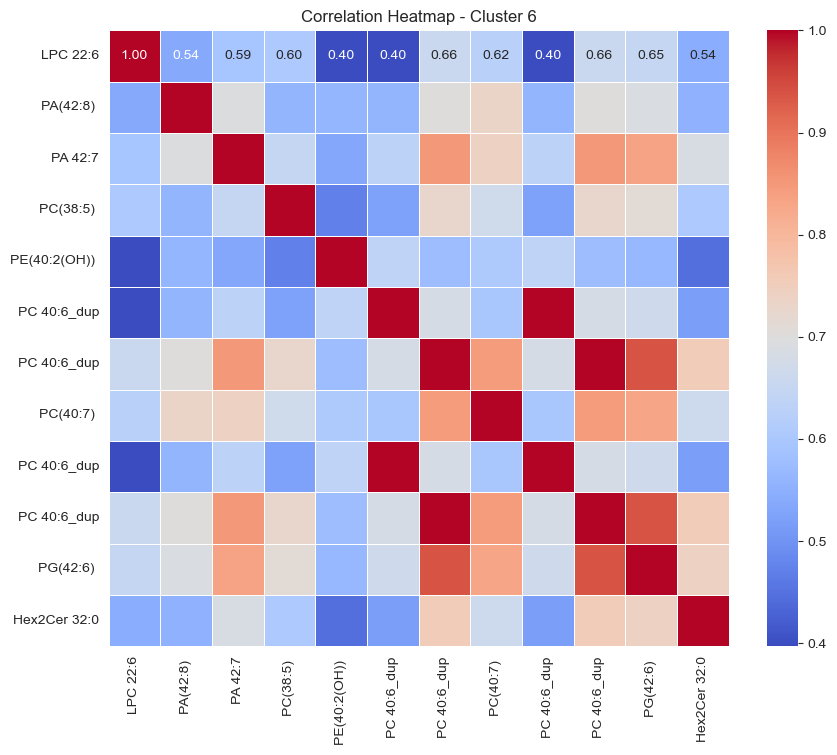

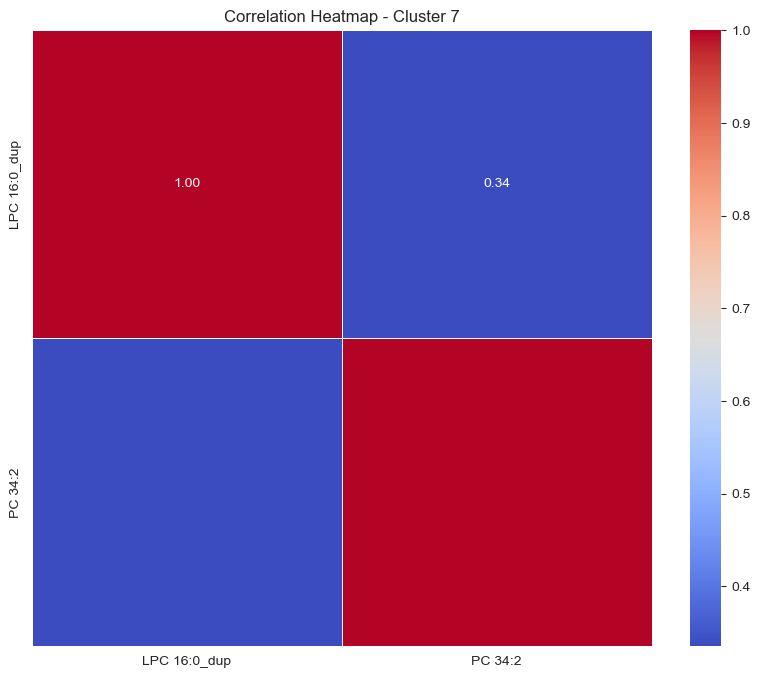

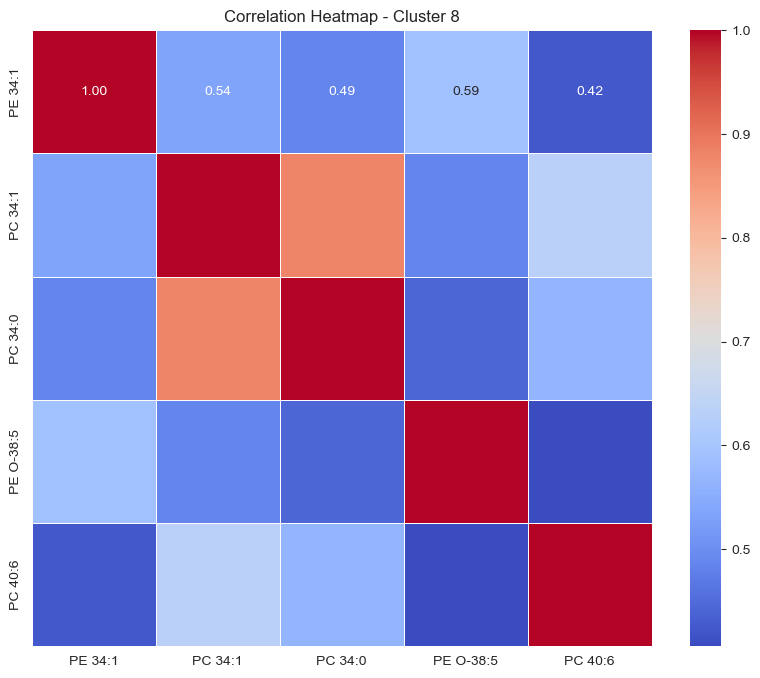

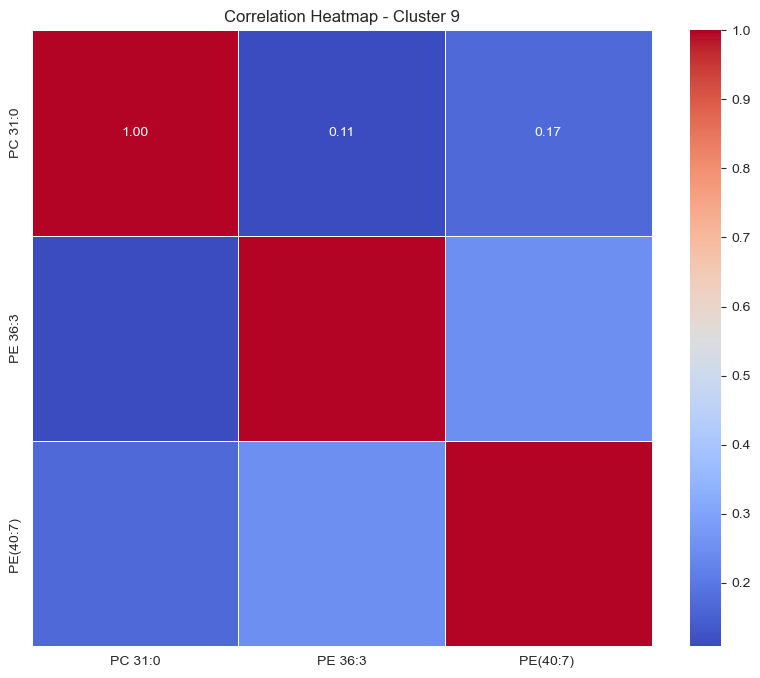

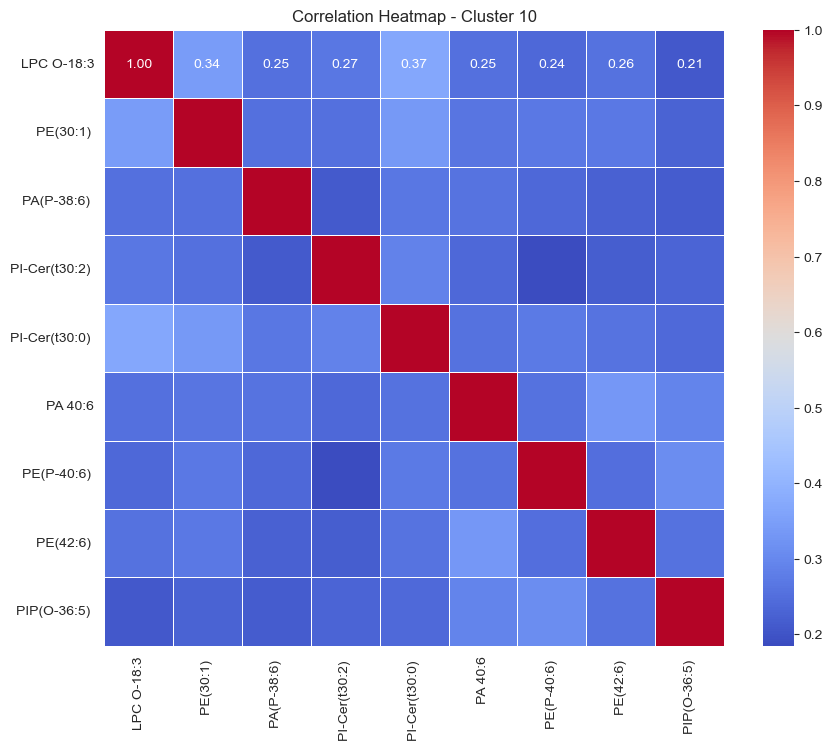

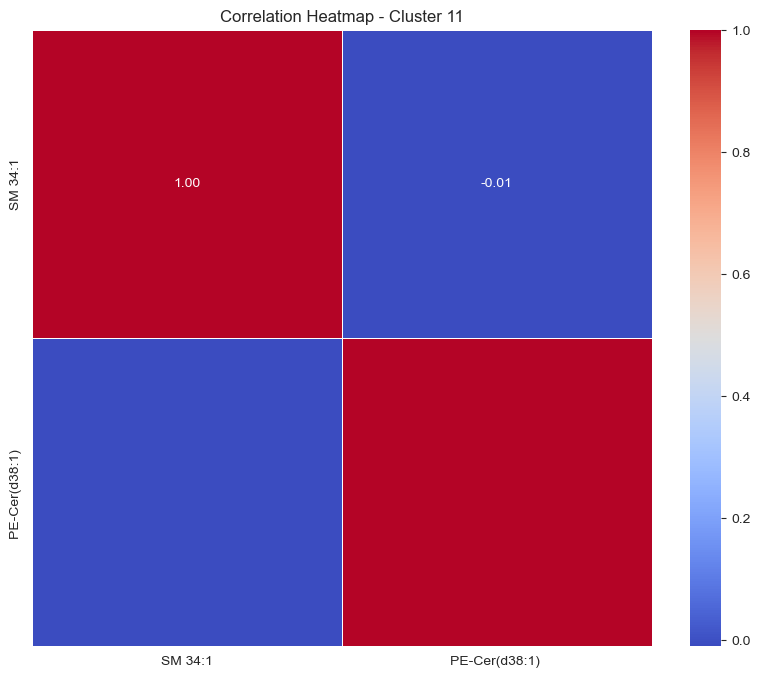

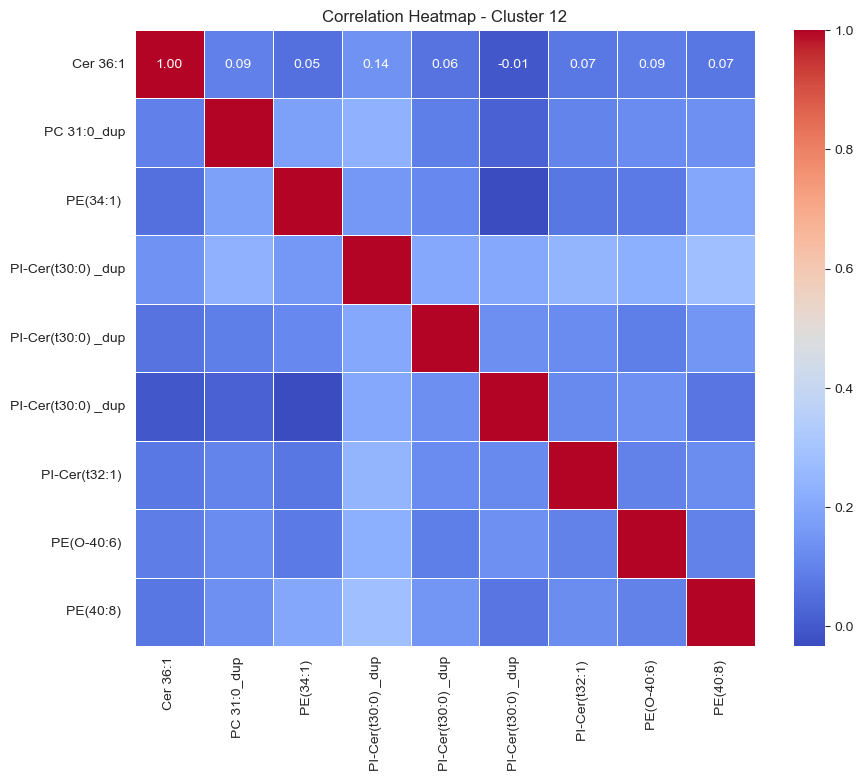

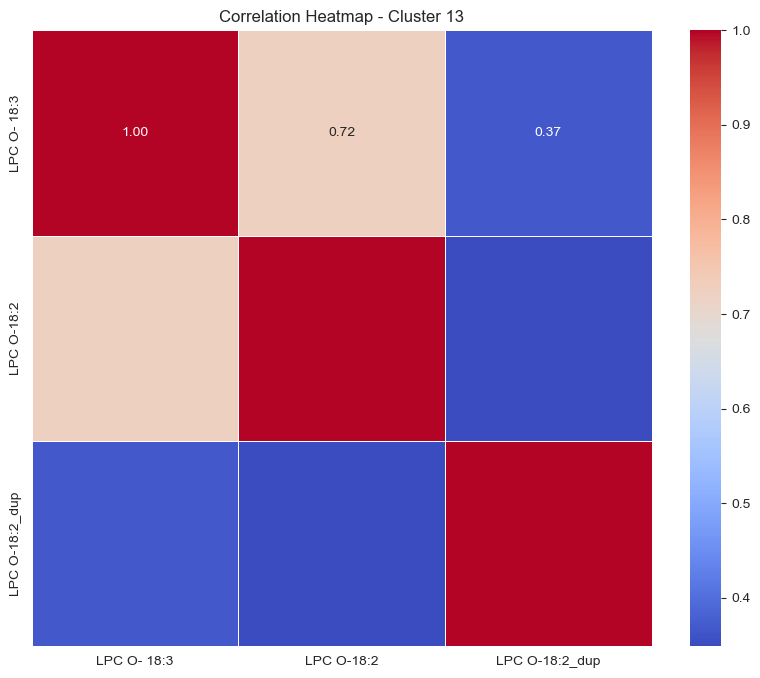

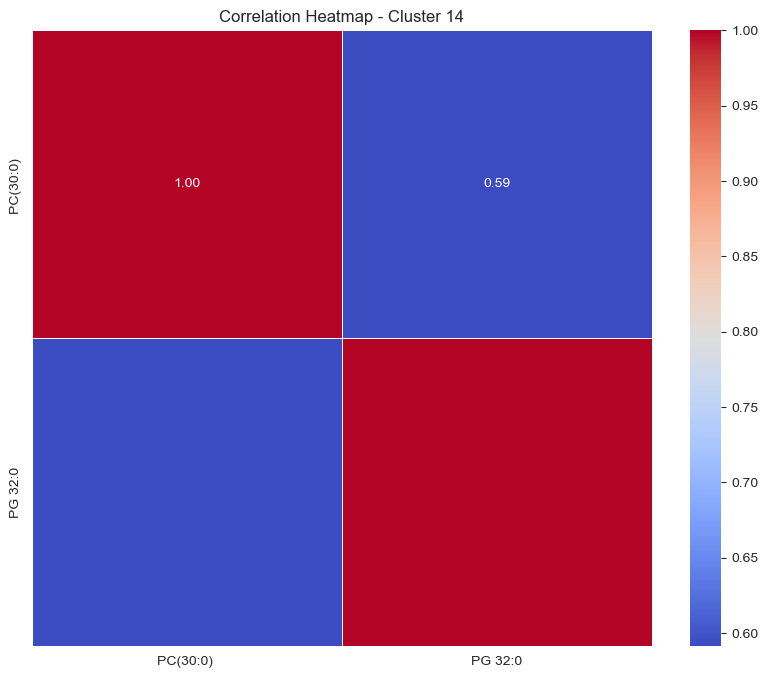

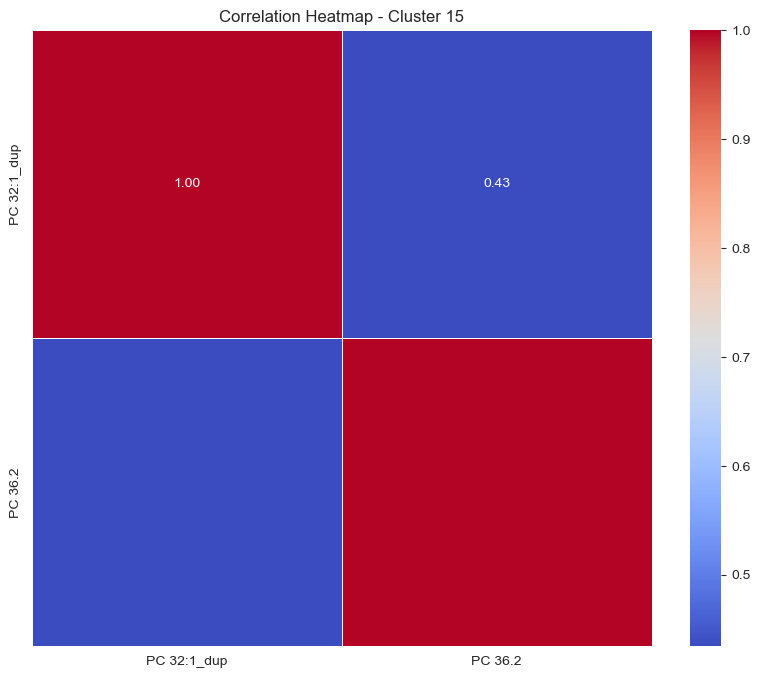

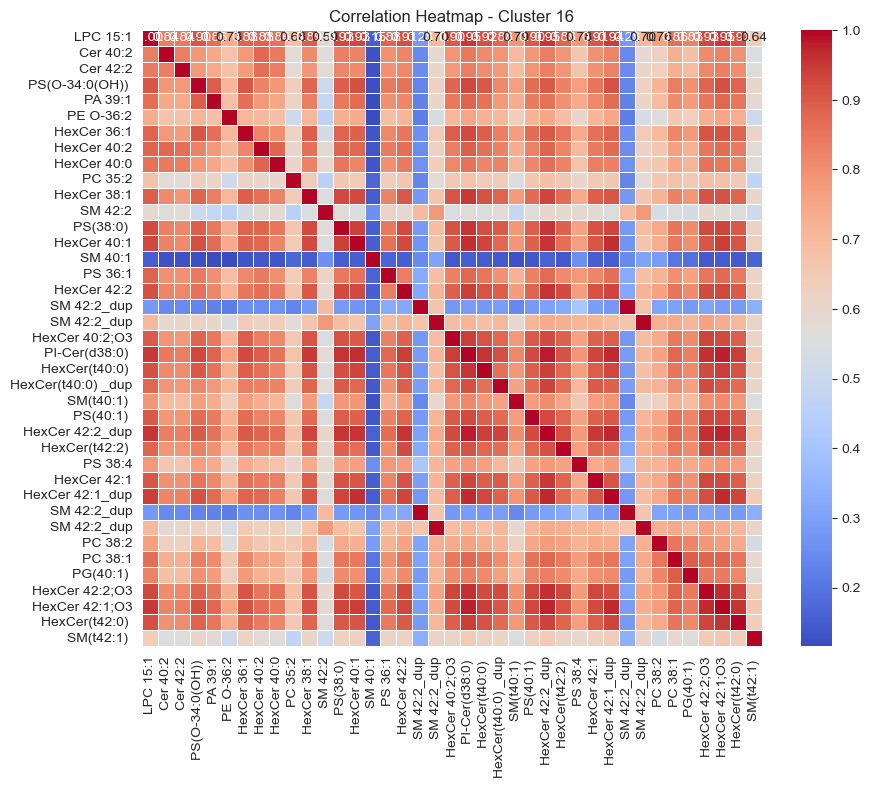

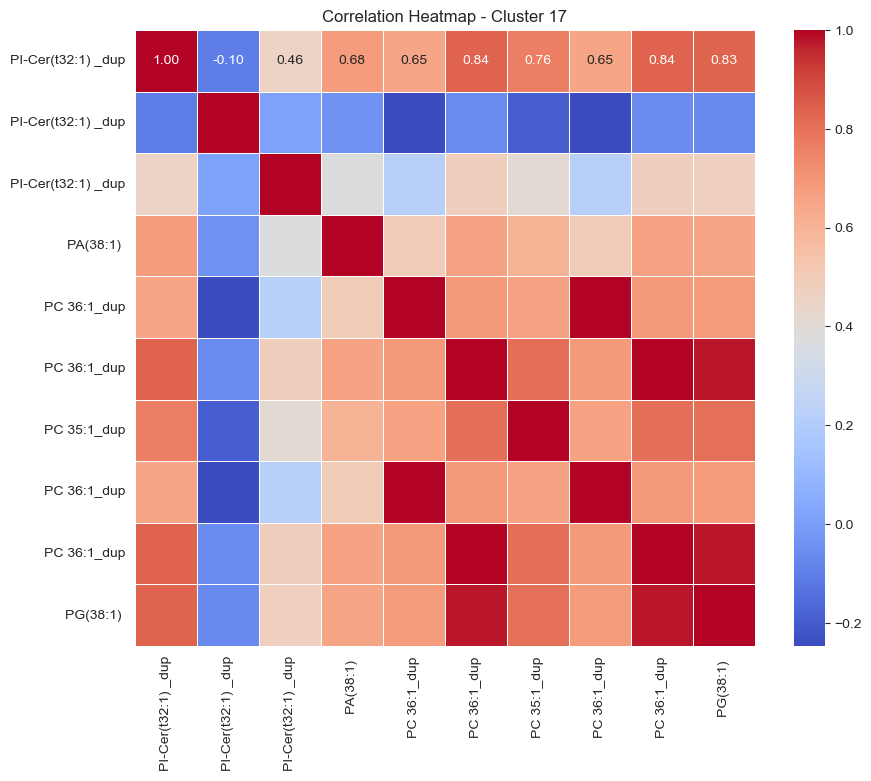

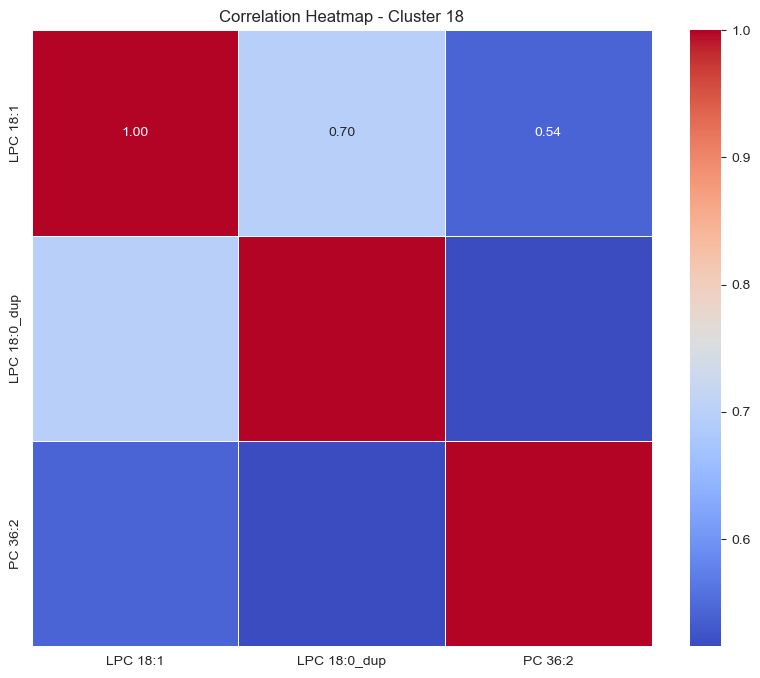

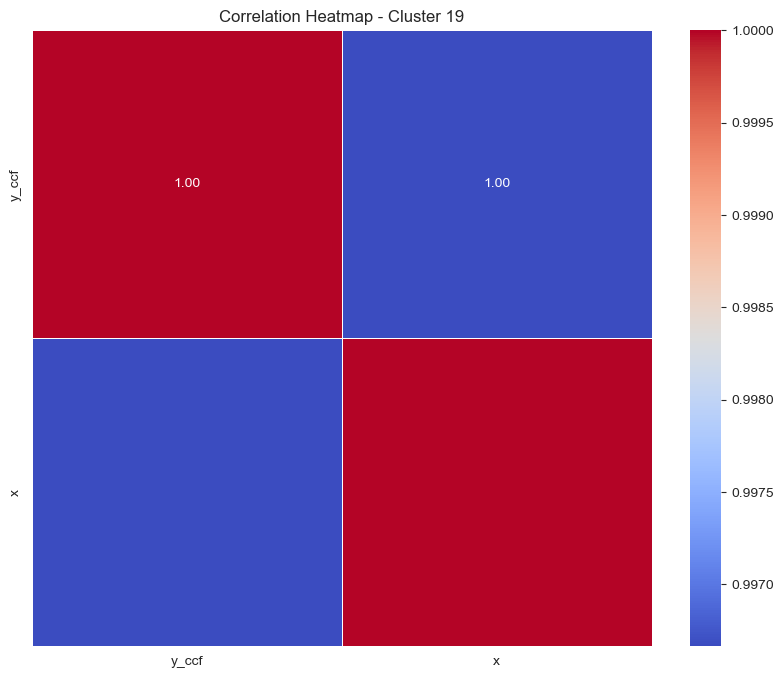

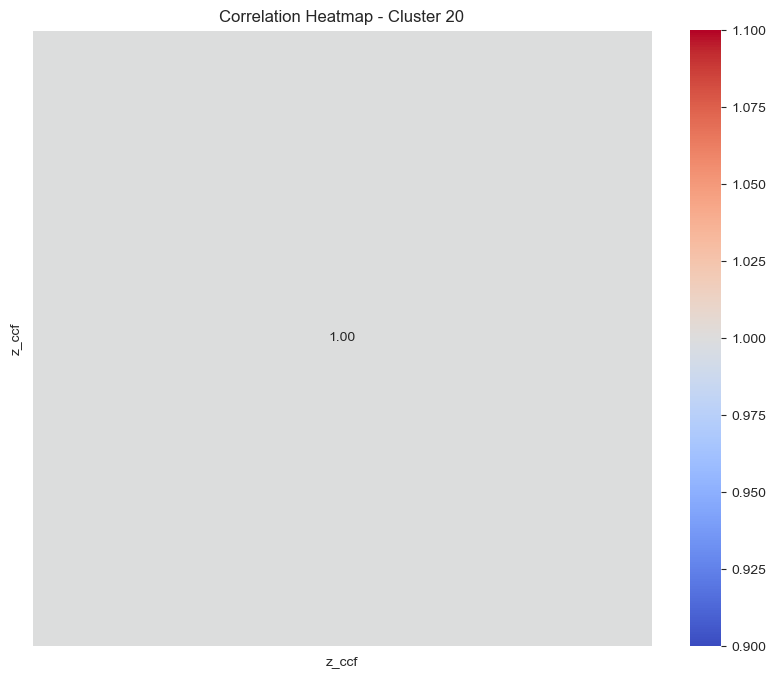

/Users/violarenne/opt/anaconda3/envs/ml-project-2-genelipids/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


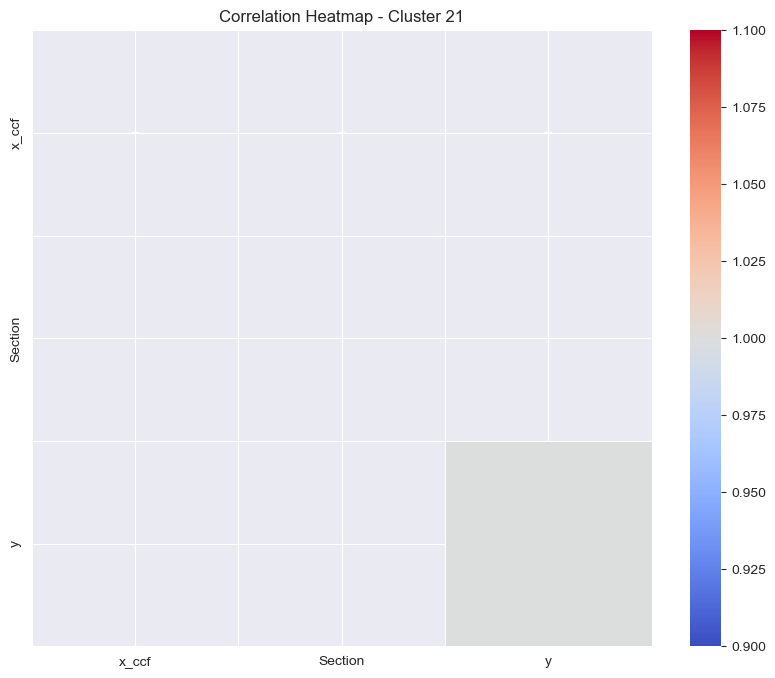

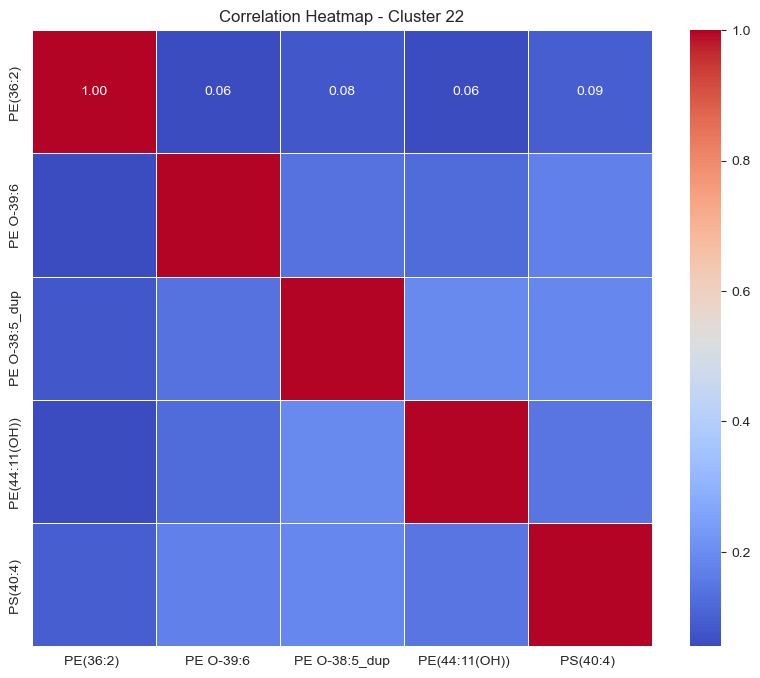

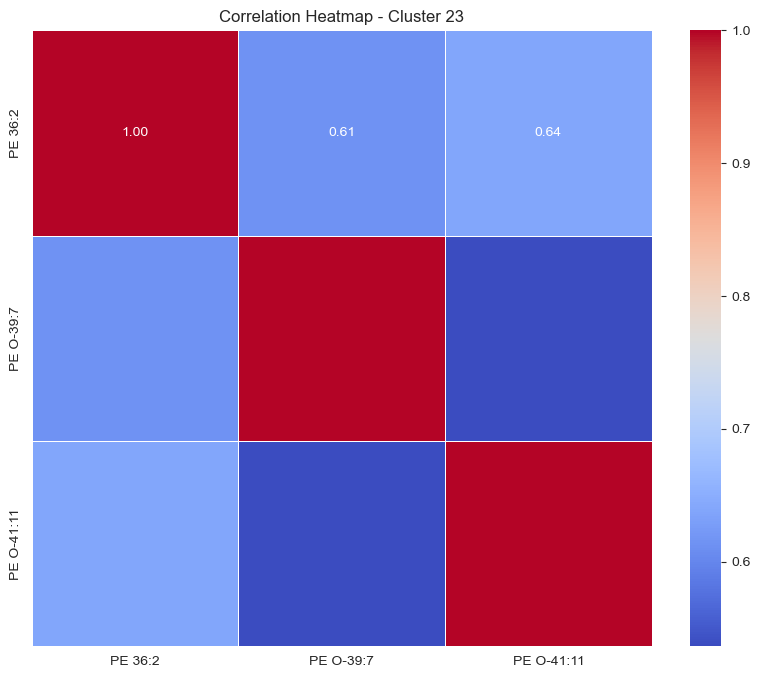

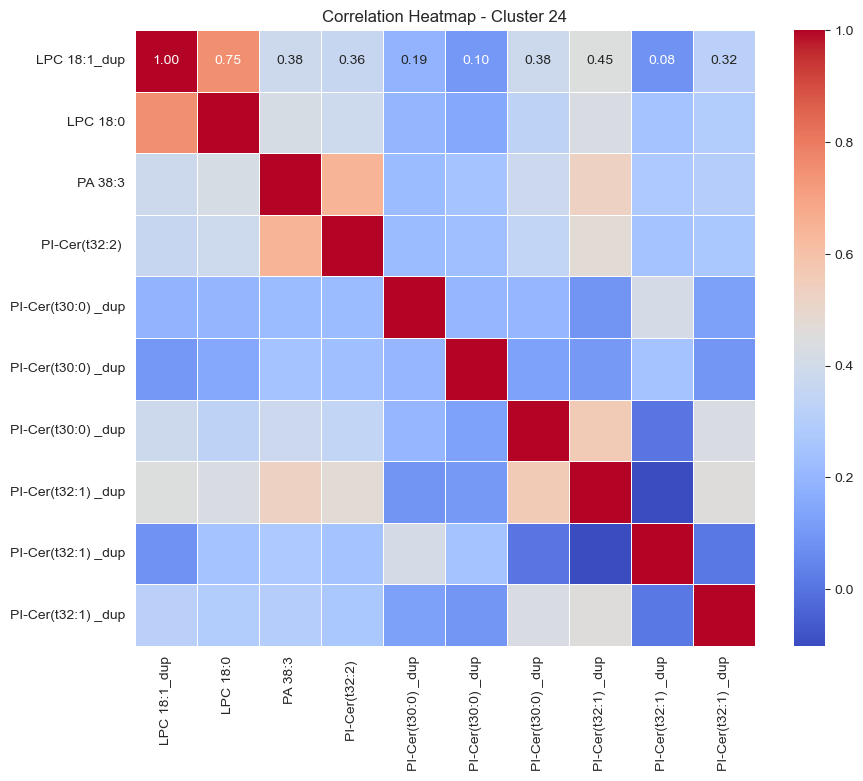

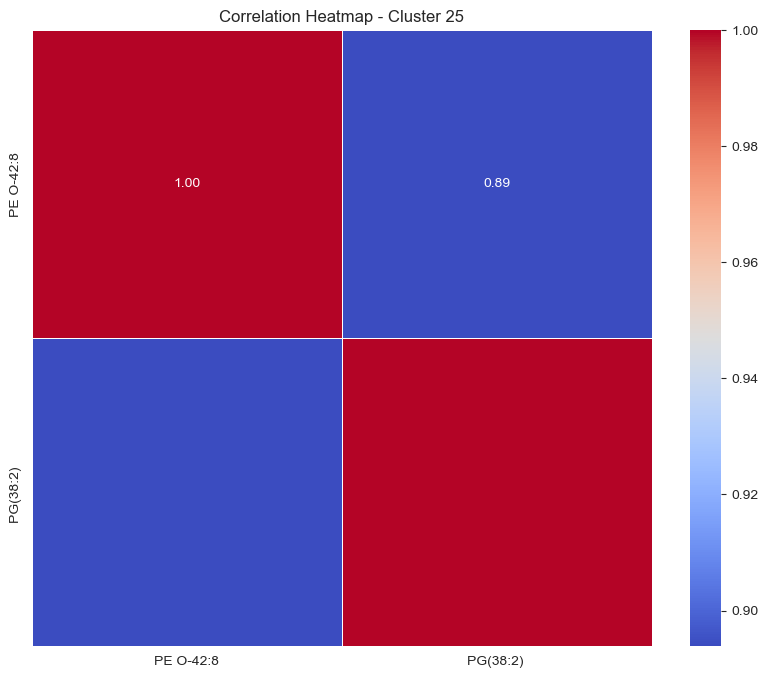

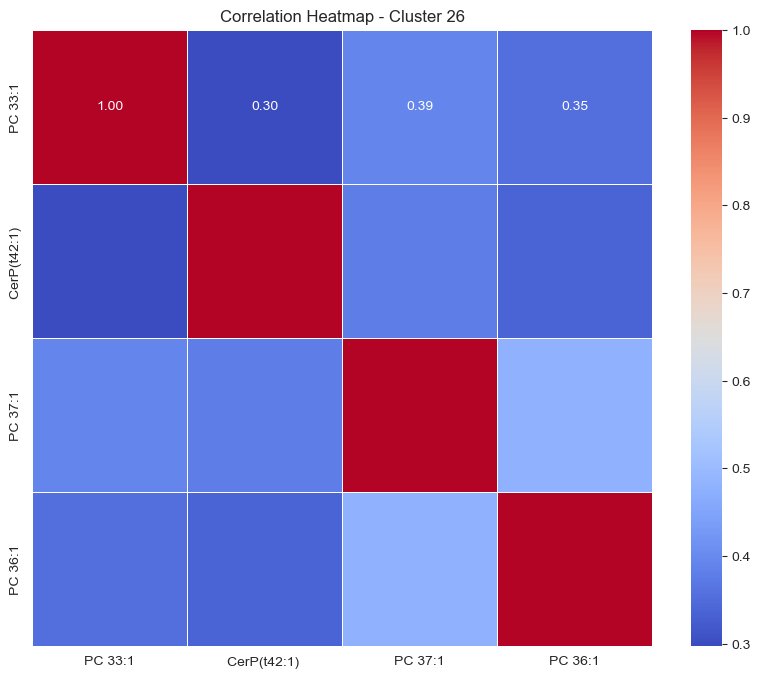

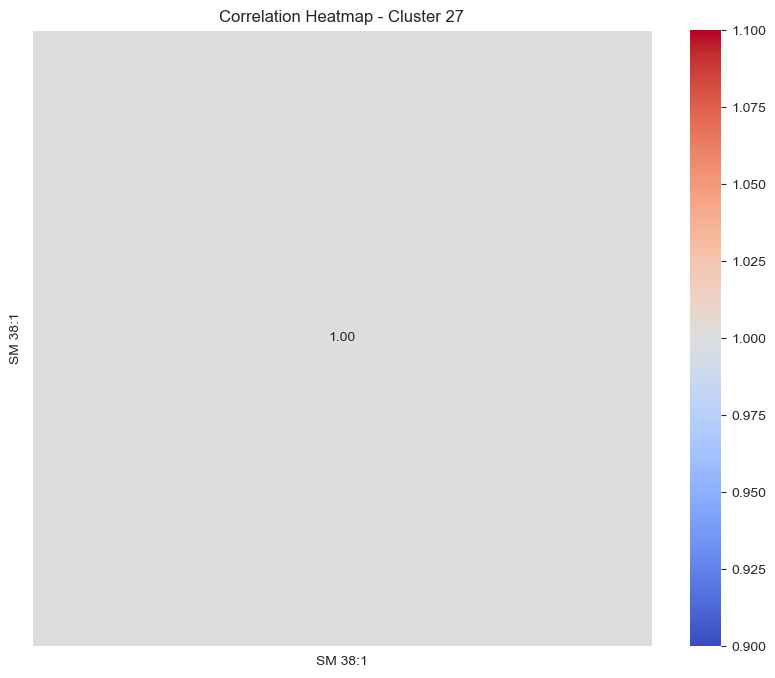

In [15]:
# Custom function to create a heatmap for the correlation matrix within each cluster
def heatmap_for_cluster(data, cluster_label):
    cluster_columns = data.columns[clusters == cluster_label]
    subset_correlation_matrix = data[cluster_columns].corr()

    # Create a heatmap for the correlation matrix within the cluster
    plt.figure(figsize=(10, 8))
    sns.heatmap(subset_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Heatmap - Cluster {cluster_label}')
    plt.show()

# Visualize correlation matrix for each cluster
for cluster_label in np.unique(clusters):
    heatmap_for_cluster(section_12, cluster_label)